<a href="https://colab.research.google.com/github/benwesedwards/ODE-to-Coffee/blob/main/ODE_to_Coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Get the CSV formatted data onto colab
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 

# DATA(5)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Data
import csv
import numpy as np
import matplotlib.pyplot as plt

num_points = 36

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/Data1.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight




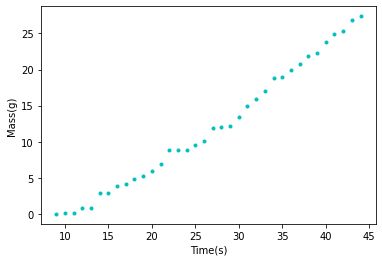

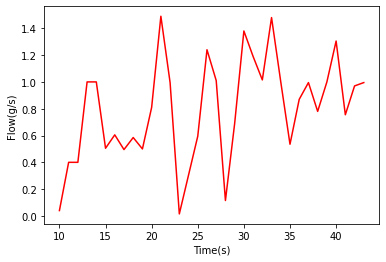

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0]
[0.04  0.4   0.4   1.    1.    0.505 0.605 0.495 0.585 0.5   0.81  1.49
 0.995 0.015 0.305 0.595 1.24  1.01  0.115 0.69  1.38  1.19  1.015 1.48
 1.    0.535 0.87  0.995 0.78  1.    1.305 0.755 0.97  0.995]
[ 0.    0.08  0.08  0.88  0.88  2.88  2.88  3.89  4.09  4.88  5.26  5.88
  6.88  8.86  8.87  8.89  9.48 10.08 11.96 12.1  12.19 13.48 14.95 15.86
 16.98 18.82 18.98 19.89 20.72 21.88 22.28 23.88 24.89 25.39 26.83 27.38]
[0.5 1.  3.  5.  6.  7.  7.  8.  7.  7.  7.  7.  7.  6.  7.  7.  7.  7.
 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  6.  5. ]


In [4]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 36
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*34
for i in range(0,34):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()
print(ts)
print(F)
print(W)
print(P)

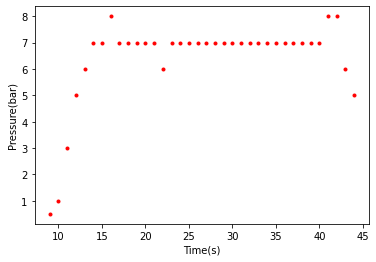

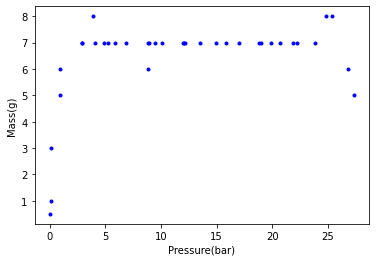

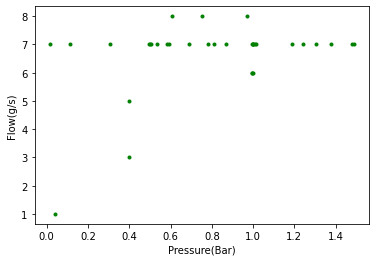

In [5]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*34

for i in range(0,34):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(Bar)")
plt.show()

This would indicate that there is no real relationship between pressure and the flow

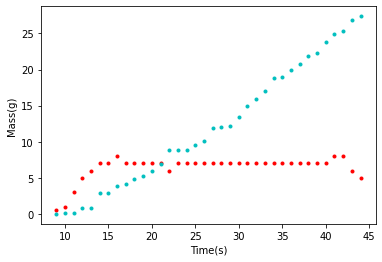

In [6]:
plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()

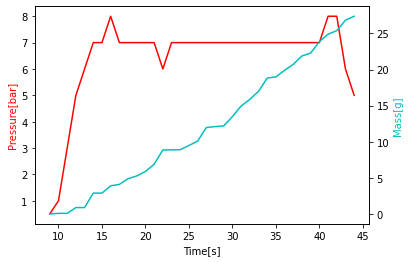

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(t, P, 'r')
ax2.plot(t, W, 'c')

ax1.set_xlabel('Time[s]')
ax1.set_ylabel('Pressure[bar]', color='r')
ax2.set_ylabel('Mass[g]', color='c')

plt.show()

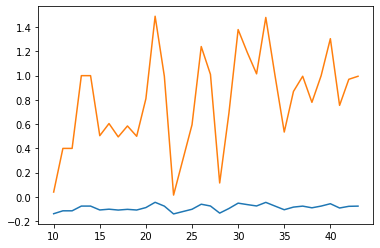

In [8]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

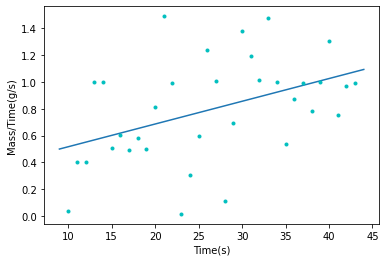

[0.01696791 0.34637968]


In [9]:
p = np.polyfit(ts,F,1)

y = np.polyval(p, t)

plt.plot(t,y)

plt.plot(ts,F,'.c')
plt.ylabel("Mass/Time(g/s)")
plt.xlabel("Time(s)")
plt.show()

print(p)

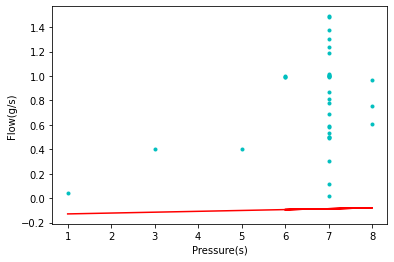

[ 0.00707756 -0.13610621]


In [10]:
#Fit bifurcation diagram, PvsF
#Bifurcate

p = np.polyfit(Ps,Fspline(F),1)

y = np.polyval(p, Ps)

plt.plot(Ps,y,'r')

plt.plot(Ps,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(s)")
plt.show()

DATA1A = p
print(DATA1A)


In [11]:
#from google.colab import drive
#drive.mount('/content/drive')


#DATA(1)

In [14]:
#Data
import csv
import numpy as np
import matplotlib.pyplot as plt

num_points = 32

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/Data(1).csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight


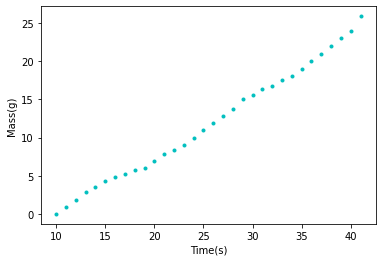

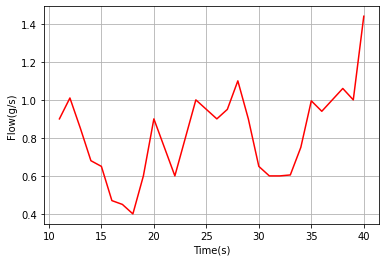

In [15]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 32
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*(N-2)
for i in range(0,N-2):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.grid()
plt.show()
#print(t)
#print(ts)
#print(F)
#print(W)
#print(P)

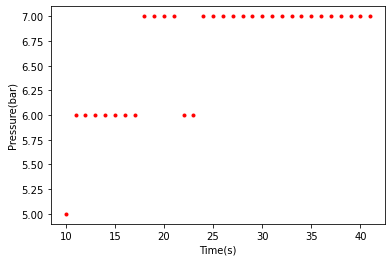

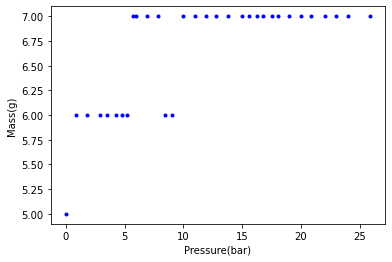

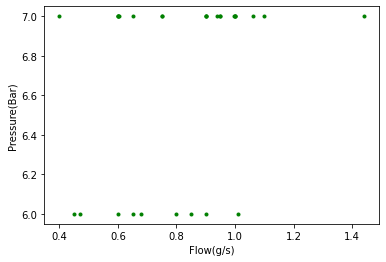

In [16]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*(N-2)

for i in range(0,N-2):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.xlabel("Flow(g/s)")
plt.ylabel("Pressure(Bar)")
plt.show()

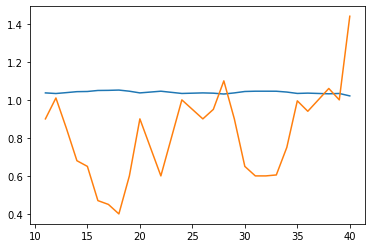

In [17]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

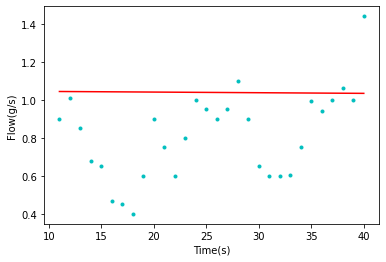

In [18]:
p = np.polyfit(ts,Fspline(F),1)

y = np.polyval(p, ts)

plt.plot(ts,y,'r')

plt.plot(ts,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()

DATA1 = p

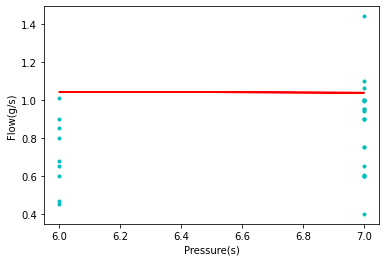

[-0.00441641  1.06877379]


In [19]:
#Bifurcate

p = np.polyfit(Ps,Fspline(F),1)

y = np.polyval(p, Ps)

plt.plot(Ps,y,'r')

plt.plot(Ps,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(s)")
plt.show()

DATA1 = p
print(DATA1)

#DATA(3)

In [20]:
#Data3
#import csv
#import numpy as np
#import matplotlib.pyplot as plt

num_points = 64

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/Data(3).csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight


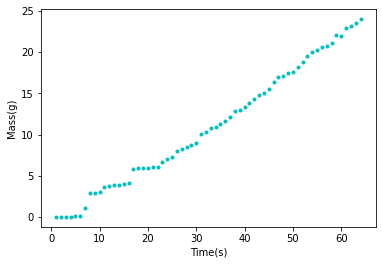

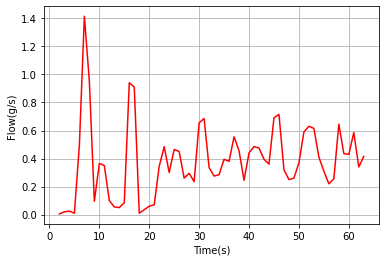

In [21]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 64
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*(N-2)
for i in range(0,N-2):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.grid()
plt.show()
#print(t)
#print(ts)
#print(F)
#print(W)
#print(P)

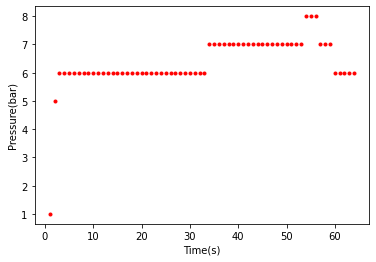

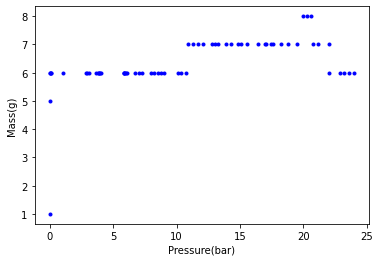

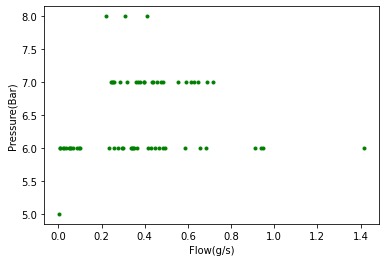

In [22]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*(N-2)

for i in range(0,N-2):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.xlabel("Flow(g/s)")
plt.ylabel("Pressure(Bar)")
plt.show()

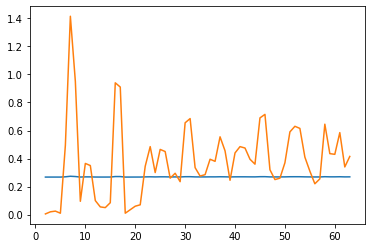

In [23]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

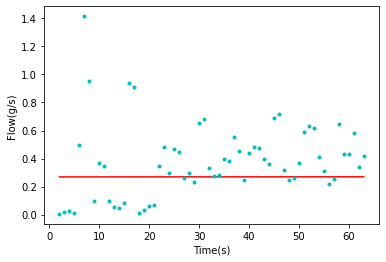

In [24]:
p = np.polyfit(ts,Fspline(F),1)

y = np.polyval(p, ts)

plt.plot(ts,y,'r')

plt.plot(ts,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()


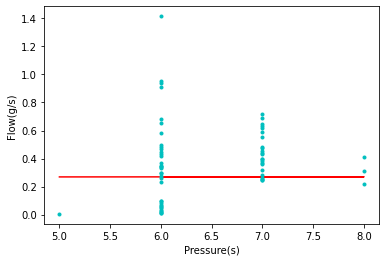

[2.42172807e-04 2.67737168e-01]


In [25]:
#Bifurcate

p = np.polyfit(Ps,Fspline(F),1)

y = np.polyval(p, Ps)

plt.plot(Ps,y,'r')

plt.plot(Ps,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(s)")
plt.show()

DATA3 = p
print(DATA3)

#DATA(4)

In [24]:
#Data3
#import csv
#import numpy as np
#import matplotlib.pyplot as plt

num_points = 35

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/Data(4).csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight


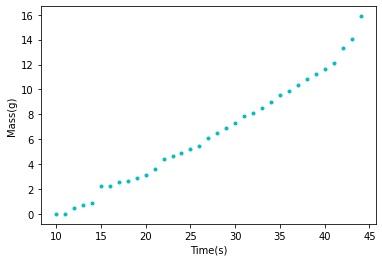

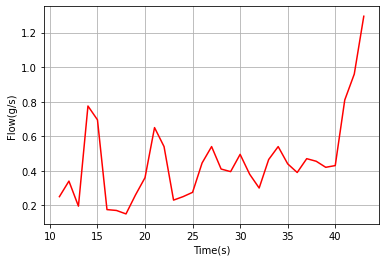

In [25]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 35
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*(N-2)
for i in range(0,N-2):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.grid()
plt.show()
#print(t)
#print(ts)
#print(F)
#print(W)
#print(P)

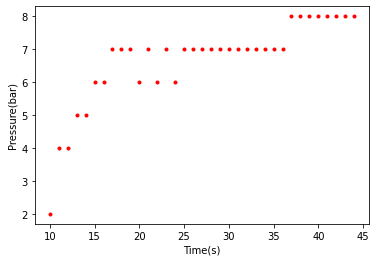

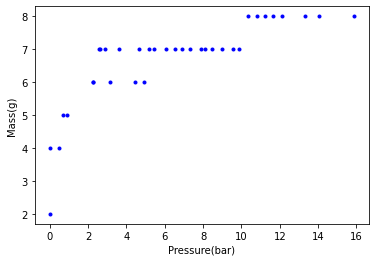

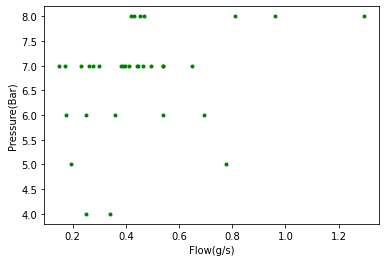

In [26]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*(N-2)

for i in range(0,N-2):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.xlabel("Flow(g/s)")
plt.ylabel("Pressure(Bar)")
plt.show()

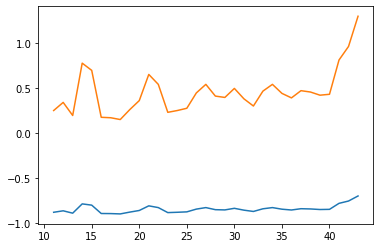

In [27]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

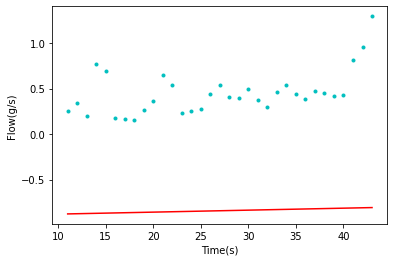

In [28]:
p = np.polyfit(ts,Fspline(F),1)

y = np.polyval(p, ts)

plt.plot(ts,y,'r')

plt.plot(ts,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()


#DATA(2)

In [9]:
#Data3
#import csv
#import numpy as np
#import matplotlib.pyplot as plt

num_points = 49

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/Data2_.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight


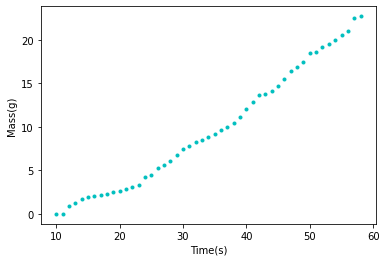

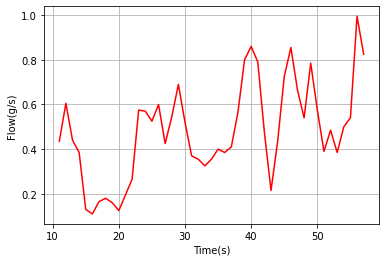

In [10]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 49
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*(N-2)
for i in range(0,N-2):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.grid()
plt.show()
#print(t)
#print(ts)
#print(F)
#print(W)
#print(P)

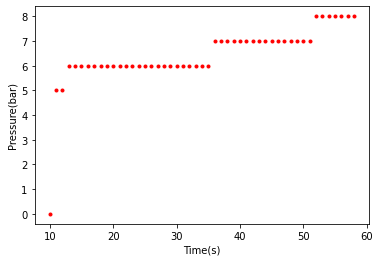

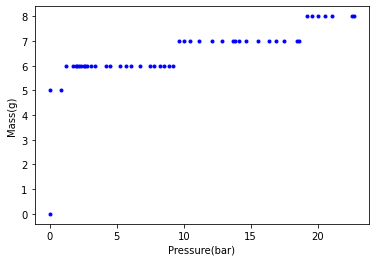

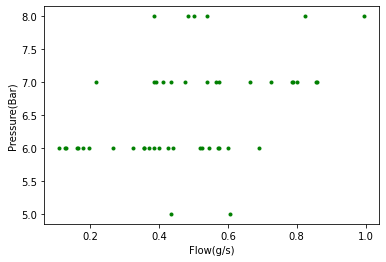

In [11]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*(N-2)

for i in range(0,N-2):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.xlabel("Flow(g/s)")
plt.ylabel("Pressure(Bar)")
plt.show()

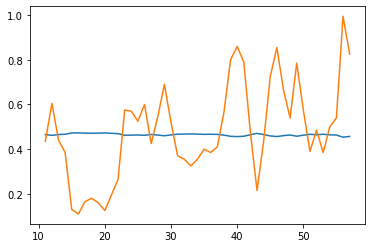

In [12]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

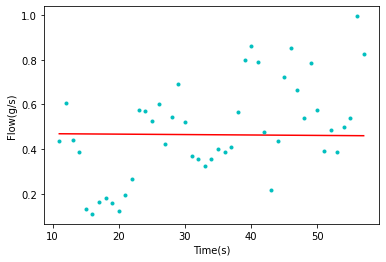

In [13]:
p = np.polyfit(ts,Fspline(F),1)

y = np.polyval(p, ts)

plt.plot(ts,y,'r')

plt.plot(ts,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()


#Bifurate

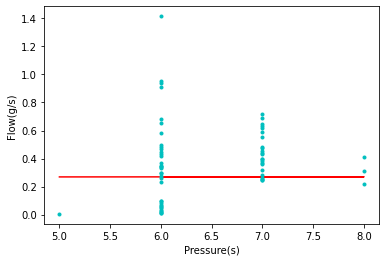

[2.42172807e-04 2.67737168e-01]


In [26]:
#Bifurcate

p = np.polyfit(Ps,Fspline(F),1)

y = np.polyval(p, Ps)

plt.plot(Ps,y,'r')

plt.plot(Ps,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(s)")
plt.show()

DATA2 = p
print(DATA2)

#Get the average results

In [27]:
Result = DATA1 + DATA2 + DATA3
Result = Result/3
print(Result)

[-0.00131069  0.53474938]


This is the amount the flow changes in relation to the pressure. Now, let's test it on some more variable flow data.



In [28]:
#LETS SEE IF WE CAN PREDICT STUFF
#import csv
#import numpy as np
#import matplotlib.pyplot as plt

num_points = 38

Pressure = np.zeros(num_points)
Weight = np.zeros(num_points)
time = np.zeros(num_points)
n=0

with open('/content/drive/MyDrive/TEST.csv', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
  next(spamreader)#skip header
  
  for row in spamreader:
    Pressure[n]=float(row[0])
    Weight[n]=float(row[1])
    time[n] = float(row[2])
    n=n+1

t = time
P = Pressure
W = Weight


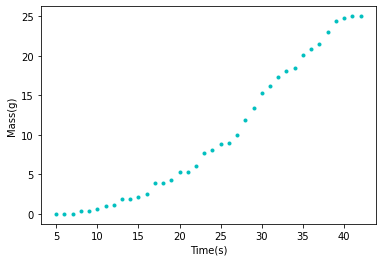

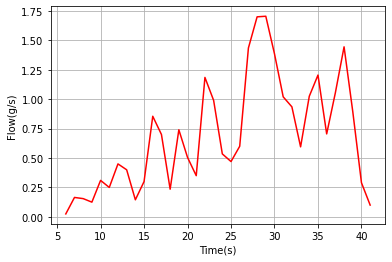

In [29]:
#Find the derivative of Weight wrt time to get flow
#centered difference method
N = 38
xc = t[1:-1] # omit first and last points
Flow = np.zeros_like(xc)  
for i in range(1,N-1):
  Flow[i-1] = (W[i+1] - W[i-1])/2/1
F = Flow

#Need to plot F against t without its first and last values
ts = [0]*(N-2)
for i in range(0,N-2):
  ts[i] = t[i+1]

plt.plot(t,W,'.c')
plt.ylabel("Mass(g)")
plt.xlabel("Time(s)")
plt.show()
plt.plot(ts,F,'r')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.grid()
plt.show()
#print(t)
#print(ts)
#print(F)
#print(W)
#print(P)

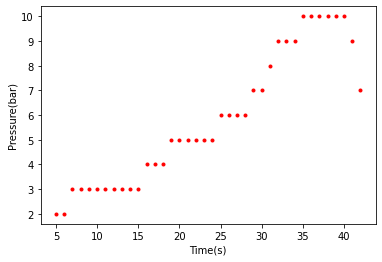

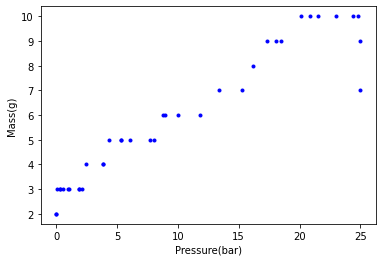

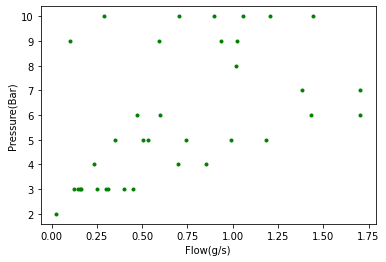

In [30]:
#More Plots

plt.plot(t,P,'.r')
plt.ylabel("Pressure(bar)")
plt.xlabel("Time(s)")
plt.show()

plt.plot(W,P,'.b')
plt.ylabel("Mass(g)")
plt.xlabel("Pressure(bar)")
plt.show()
#To plot pressure vs flow, we also need to remove first and last values from pressure

Ps = [0]*(N-2)

for i in range(0,N-2):
  Ps[i] = P[i+1]

plt.plot(F,Ps,'.g')
plt.xlabel("Flow(g/s)")
plt.ylabel("Pressure(Bar)")
plt.show()

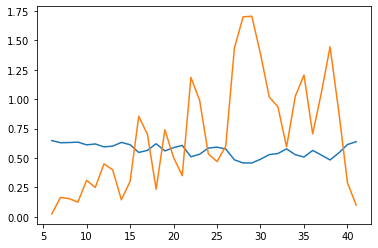

In [31]:
Fspline = UnivariateSpline(ts,F)
plt.plot(ts,Fspline(F))
plt.plot(ts,F)
plt.show()

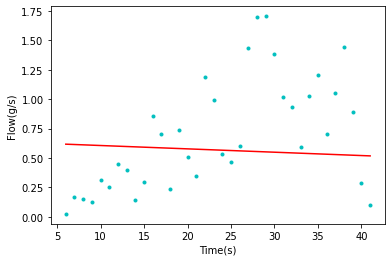

In [32]:
p = np.polyfit(ts,Fspline(F),1)

y = np.polyval(p, ts)

plt.plot(ts,y,'r')

plt.plot(ts,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Time(s)")
plt.show()


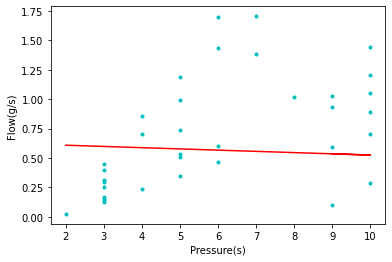

[-0.01044412  0.6297584 ]


In [33]:
#Bifurcate

p = np.polyfit(Ps,Fspline(F),1)

y = np.polyval(p, Ps)

plt.plot(Ps,y,'r')

plt.plot(Ps,F,'.c')
plt.ylabel("Flow(g/s)")
plt.xlabel("Pressure(s)")
plt.show()

TEST = p
print(TEST)

In [34]:
print(Result)

[-0.00131069  0.53474938]


The results predice that I can take the pressures given and predict the flow rate using y = mx + b, where m = -0.00228588 and b = 0.60620251

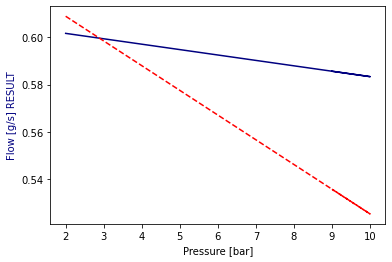

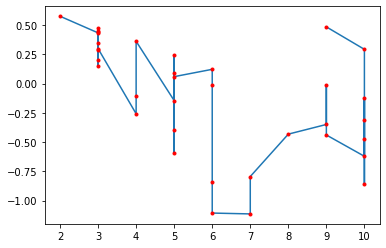

In [35]:
#Let's see if it works
#Plot our line against the spline

m = -0.00228588
b = 0.60620251

F_TEST = [0]*(N-2)
error = [0]*(N-2)
error2 = error
for i in range(N-2):
  F_TEST[i] = m*Ps[i] + b
  #error
  error[i] = F_TEST[i] - Fspline(F)[i]
  error2[i] = F_TEST[i] - F[i]

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
plt.plot(Ps,F_TEST, color='navy' )
plt.plot(Ps,y,"--r")

plt.xlabel('Pressure [bar]')
plt.ylabel('Flow [g/s] RESULT', color='navy')
#plt.ylabel('Flow [g/s] REAL (SPLINE_FIT)', color='r')

plt.show()

plt.plot(Ps,error)
plt.plot(Ps,error2,'.r')
plt.show()

Now, let's move it to predicted flow vs time?

6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
[0.60163075, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.59934487, 0.5970589900000001, 0.5970589900000001, 0.5970589900000001, 0.59477311, 0.59477311, 0.59477311, 0.59477311, 0.59477311, 0.59477311, 0.59248723, 0.59248723, 0.59248723, 0.59248723, 0.5902013500000001, 0.5902013500000001, 0.58791547, 0.58562959, 0.58562959, 0.58562959, 0.5833437100000001, 0.5833437100000001, 0.5833437100000001, 0.5833437100000001, 0.5833437100000001, 0.5833437100000001, 0]


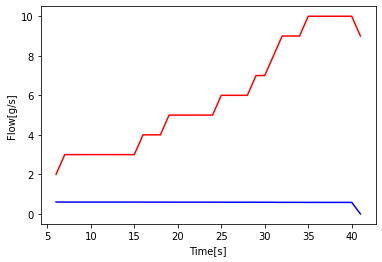

In [44]:
#Predicted flow vs time
#make a function that takes ts[i], then takes the coorisponding Ps[i], and converts it to predicted flow

def flo(t):
  i = t-6
  
  return m*Ps[i]+b

floarray = [0]*36

for i in range(0,35):
  print(ts[i])
  floarray[i] = flo(int(ts[i]))
print(floarray)
plt.plot(ts,floarray,'b')
plt.plot(ts,Ps,'r')
plt.xlabel("Time[s]")
plt.ylabel("Flow[g/s]")
plt.show()